In [35]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


In [2]:
data = pd.read_csv('report_2018-2019.csv')

In [3]:
data.head()

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114


In [4]:
data.tail()

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
307,152,Yemen,2018,3.355,0.442,1.073,0.343,0.244,0.083,0.064
308,138,Zambia,2019,4.107,0.578,1.058,0.426,0.431,0.247,0.087
309,125,Zambia,2018,4.377,0.562,1.047,0.295,0.503,0.221,0.082
310,146,Zimbabwe,2019,3.663,0.366,1.114,0.433,0.361,0.151,0.089
311,144,Zimbabwe,2018,3.692,0.357,1.094,0.248,0.406,0.132,0.099


In [11]:
X = data.drop(['Overall rank', 'Country or region', 'Score', 'Year'],axis=1)
Y = data['Score']

In [6]:
X.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0.350,0.517,0.361,0.000,0.158,0.025
1,0.332,0.537,0.255,0.085,0.191,0.036
2,0.947,0.848,0.874,0.383,0.178,0.027
3,0.916,0.817,0.790,0.419,0.149,0.032
4,1.002,1.160,0.785,0.086,0.073,0.114


In [7]:
Y.head()

0    3.203
1    3.632
2    4.719
3    4.586
4    5.211
Name: Score, dtype: float64

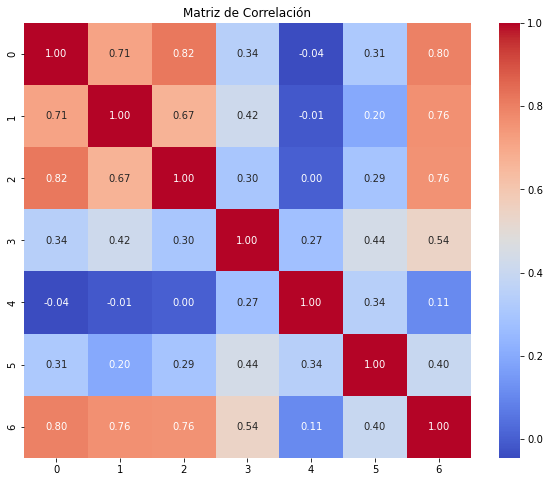

In [8]:
correlation_matrix = np.corrcoef(X, Y, rowvar=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

In [13]:
scaler = StandardScaler()

In [23]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [25]:
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [28]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'Training MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Coefficient: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Training MSE: 0.29409991649019557
Test MSE: 0.21626492365764233
Coefficient: [0.44195339 0.31530097 0.18027752 0.2144765  0.09038645 0.07568558]
Intercept: 5.349344036697248


In [36]:
models = {
    'Linear Regression': LinearRegression(),
    # 'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR()
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    
    print(f"{name} - Training MSE: {mse_train}")
    print(f"{name} - Test MSE: {mse_test}")
    print("------")

Training Linear Regression...
Linear Regression - Training MSE: 0.29409991649019557
Linear Regression - Test MSE: 0.21626492365764233
------
Training Lasso Regression...
Lasso Regression - Training MSE: 0.3196091004490806
Lasso Regression - Test MSE: 0.22531186939169476
------
Training Decision Tree...
Decision Tree - Training MSE: 0.0
Decision Tree - Test MSE: 0.3517143829787233
------
Training Random Forest...
Random Forest - Training MSE: 0.035863259108715365
Random Forest - Test MSE: 0.18901256712872314
------
Training Support Vector Regression...
Support Vector Regression - Training MSE: 0.1634804729757807
Support Vector Regression - Test MSE: 0.17724473351721312
------
